# Random forest

In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("../Data/Heart.csv", index_col = 0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [57]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


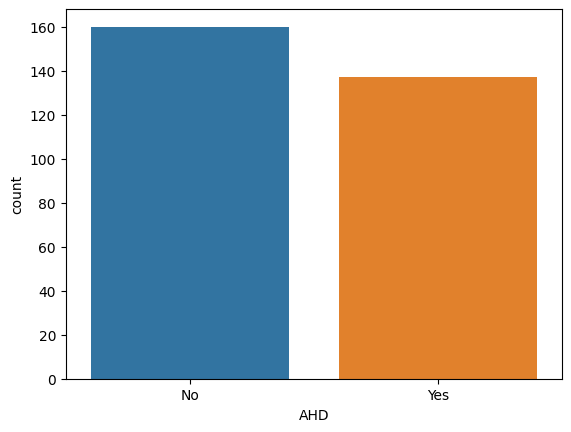

In [58]:
sns.countplot(data = df, x = "AHD");

In [59]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [60]:
from sklearn.model_selection import train_test_split
from utils import print_shapes

X, y = df.drop("AHD_Yes", axis=1), df["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print_shapes(X_train, X_test, y_train, y_test)



X_train.shape = (198, 16)
X_test.shape = (99, 16)
y_train.shape = (198,)
y_test.shape = (99,)



## Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

### Hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# course  tuning
param_grid = {"n_estimators": [100, 150, 200,
                               300], "max_depth":[5,10,15,20]}
# for more refined tuning repeat that process using parameters closer to the best parameters found in the course search
clf = GridSearchCV(RandomForestClassifier(), param_grid,
                   cv=5, verbose=1, scoring="recall")
clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [63]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [64]:
clf.best_params_

{'max_depth': 15, 'n_estimators': 100}

## Evaluation 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        53
           1       0.83      0.76      0.80        46

    accuracy                           0.82        99
   macro avg       0.82      0.81      0.82        99
weighted avg       0.82      0.82      0.82        99



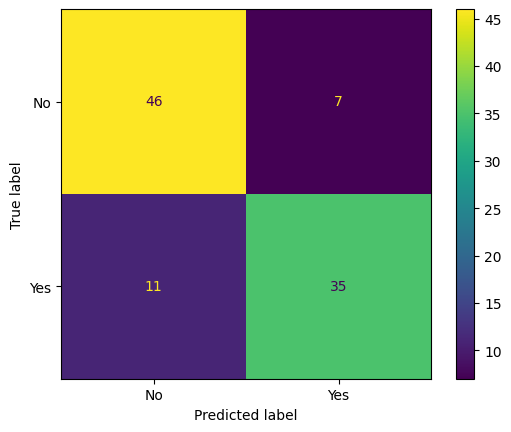

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()


evaluate_classification(y_test, y_pred) 

### Feature importance

Note: to do feature importantce its better to use one-hot coding to not lose information on the dropped column

In [66]:
model_rf.feature_importances_

array([0.0931407 , 0.03372479, 0.07013429, 0.0792663 , 0.00730311,
       0.02068672, 0.1240207 , 0.04023465, 0.10045081, 0.02231842,
       0.17844666, 0.04327672, 0.00937807, 0.01567818, 0.09106361,
       0.07087628])

In [67]:
model_rf.feature_importances_.sum()

1.0

In [68]:
model_rf.feature_importances_.__len__()

16

In [69]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.head()

,0,1
0,Age,0.093141
1,Sex,0.033725
2,RestBP,0.070134
3,Chol,0.079266
4,Fbs,0.007303


In [70]:

feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)


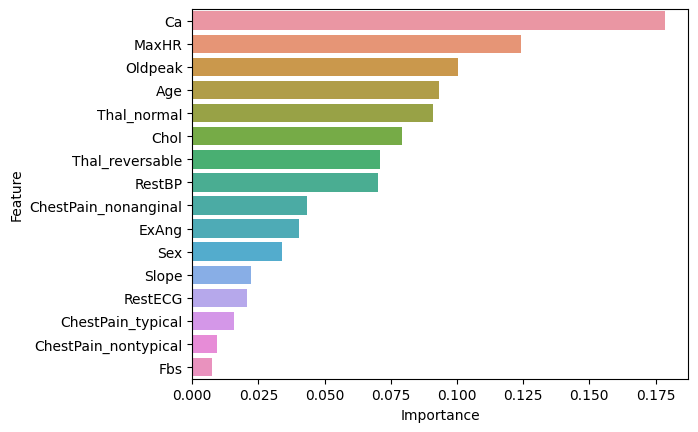

In [71]:
sns.barplot(data = feature_importance, x = "Importance", y = "Feature");